Importing and Loading in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np

In [2]:
#Read the flights.csv file
flights = pd.read_csv("flights.csv/flights.csv")

#Dislay the data
display(flights)

C:\Users\jabal\AppData\Local\Temp\ipykernel_26080\3650259838.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("flights.csv/flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Sampling

In [3]:
#Sampling 1,000,000 values from the dataframe
df = flights.sample(n=1000000, random_state=64)

#Confirm sample is correct by printing shape
print("Shape of new project dataset:", df.shape)

Shape of new project dataset: (1000000, 31)


Preprocessing 

In [4]:
#Check how many null values are in the dataset
#Filter the columns to show only those with null values
print(df.isnull().sum()[df.isnull() .sum() > 0])

TAIL_NUMBER              2542
DEPARTURE_TIME          14630
DEPARTURE_DELAY         14630
TAXI_OUT                15148
WHEELS_OFF              15148
SCHEDULED_TIME              1
ELAPSED_TIME            17816
AIR_TIME                17816
WHEELS_ON               15705
TAXI_IN                 15705
ARRIVAL_TIME            15705
ARRIVAL_DELAY           17816
CANCELLATION_REASON    984714
AIR_SYSTEM_DELAY       817169
SECURITY_DELAY         817169
AIRLINE_DELAY          817169
LATE_AIRCRAFT_DELAY    817169
WEATHER_DELAY          817169
dtype: int64


In [5]:
#List of columns we want to keep(the rest have too many null values or are irrelevant to our model)
columns_to_keep = [
    'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME', 'DISTANCE', 'ARRIVAL_DELAY', 'CANCELLED' 
]

df = df[columns_to_keep]

df = df.fillna(0)

display(df)


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE,ARRIVAL_DELAY,CANCELLED
5266008,11,25,3,WN,DEN,PDX,2220,15,175.0,991,-9.0,0
1284652,3,24,2,MQ,LAW,DFW,1722,1809,47.0,140,-8.0,0
4745705,10,23,5,UA,13930,12266,1550,1835,165.0,925,8.0,0
3471346,8,4,2,OO,SFO,BUR,1643,1808,85.0,326,26.0,0
649019,2,12,4,DL,MEM,ATL,1835,2057,82.0,332,-11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1820600,4,26,7,OO,IND,DEN,2024,2112,168.0,977,-11.0,0
1603501,4,13,1,WN,PVD,BWI,1205,1325,80.0,327,2.0,0
4291158,9,24,4,WN,STL,HOU,2110,2305,115.0,687,-13.0,0
4925302,11,4,3,AA,BWI,DFW,1030,1300,210.0,1217,-20.0,0


Time-Based Feature Engineering

In [6]:
#Create hour of day from scheduled departure which is in HHMM eg 1530 => 15
df['HOUR_OF_DAY'] = df['SCHEDULED_DEPARTURE'] //100

#highest possible hour should be 23(sometimes departure time can be 2400)
df['HOUR_OF_DAY'] = df['HOUR_OF_DAY'].clip(upper=23)

#Create a function to determine delays
def delays(row):
    delay = row['ARRIVAL_DELAY']
    if delay < 10:
        return 0 #ontime
    elif delay >= 10 or row['CANCELLED'] == 1:
        return 1 #delayed
    

df['delay'] = df.apply(delays, axis=1)


Now we do not need CANCELLED or ARRIVAL_DELAY anymore, so we drop those

In [7]:
df = df.drop(columns = ['ARRIVAL_DELAY' , 'CANCELLED'])

display(df)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE,HOUR_OF_DAY,delay
5266008,11,25,3,WN,DEN,PDX,2220,15,175.0,991,22,0
1284652,3,24,2,MQ,LAW,DFW,1722,1809,47.0,140,17,0
4745705,10,23,5,UA,13930,12266,1550,1835,165.0,925,15,0
3471346,8,4,2,OO,SFO,BUR,1643,1808,85.0,326,16,1
649019,2,12,4,DL,MEM,ATL,1835,2057,82.0,332,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1820600,4,26,7,OO,IND,DEN,2024,2112,168.0,977,20,0
1603501,4,13,1,WN,PVD,BWI,1205,1325,80.0,327,12,0
4291158,9,24,4,WN,STL,HOU,2110,2305,115.0,687,21,0
4925302,11,4,3,AA,BWI,DFW,1030,1300,210.0,1217,10,0


One-Hot Encoding

In [8]:
#One-hot encode the AIRLINE column but keep it for future reference
df['AIRLINE_ORIGINAL'] = df['AIRLINE']
df = pd.get_dummies(df, columns=['AIRLINE'])

#one-hot encode the top 10 busiest airports
#step1=find the 10 busiest origin airports
top_airports = df['ORIGIN_AIRPORT'].value_counts().nlargest(10).index

#step2=group them together, put the other airports in 'OTHER'
df['ORIGIN_AIRPORT_GROUPED'] = df['ORIGIN_AIRPORT'].apply(lambda x: x if x in top_airports else 'OTHER')

#step3=one-hot encode
origin_airport_dummies = pd.get_dummies(df['ORIGIN_AIRPORT_GROUPED'], prefix='ORIGIN')

#repeat for destination airports
top_dest_airports = df['DESTINATION_AIRPORT'].value_counts().nlargest(10).index
df['DESTINATION_AIRPORT_GROUPED'] = df['DESTINATION_AIRPORT'].apply(lambda x: x if x in top_dest_airports else 'OTHER')
dest_airport_dummies = pd.get_dummies(df['DESTINATION_AIRPORT_GROUPED'], prefix='DEST')

#concatenate the top10 in both
df = pd.concat([df, origin_airport_dummies, dest_airport_dummies], axis=1)

display(df)

print(df.columns)

,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE,HOUR_OF_DAY,...,DEST_DEN,DEST_DFW,DEST_IAH,DEST_LAS,DEST_LAX,DEST_MSP,DEST_ORD,DEST_OTHER,DEST_PHX,DEST_SFO
5266008,11,25,3,DEN,PDX,2220,15,175.0,991,22,...,False,False,False,False,False,False,False,True,False,False
1284652,3,24,2,LAW,DFW,1722,1809,47.0,140,17,...,False,True,False,False,False,False,False,False,False,False
4745705,10,23,5,13930,12266,1550,1835,165.0,925,15,...,False,False,False,False,False,False,False,True,False,False
3471346,8,4,2,SFO,BUR,1643,1808,85.0,326,16,...,False,False,False,False,False,False,False,True,False,False
649019,2,12,4,MEM,ATL,1835,2057,82.0,332,18,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820600,4,26,7,IND,DEN,2024,2112,168.0,977,20,...,True,False,False,False,False,False,False,False,False,False
1603501,4,13,1,PVD,BWI,1205,1325,80.0,327,12,...,False,False,False,False,False,False,False,True,False,False
4291158,9,24,4,STL,HOU,2110,2305,115.0,687,21,...,False,False,False,False,False,False,False,True,False,False
4925302,11,4,3,BWI,DFW,1030,1300,210.0,1217,10,...,False,True,False,False,False,False,False,False,False,False


Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME',
       'DISTANCE', 'HOUR_OF_DAY', 'delay', 'AIRLINE_ORIGINAL', 'AIRLINE_AA',
       'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN', 'ORIGIN_AIRPORT_GROUPED',
       'DESTINATION_AIRPORT_GROUPED', 'ORIGIN_ATL', 'ORIGIN_DEN', 'ORIGIN_DFW',
       'ORIGIN_IAH', 'ORIGIN_LAS', 'ORIGIN_LAX', 'ORIGIN_ORD', 'ORIGIN_OTHER',
       'ORIGIN_PHX', 'ORIGIN_SEA', 'ORIGIN_SFO', 'DEST_ATL', 'DEST_DEN',
       'DEST_DFW', 'DEST_IAH', 'DEST_LAS', 'DEST_LAX', 'DEST_MSP', 'DEST_ORD',
       'DEST_OTHER', 'DEST_PHX', 'DEST_SFO'],
      dtype='object')


In [9]:
#Now no need for the top 10 group columns we created above, and can now drop them:
df = df.drop(columns=['ORIGIN_AIRPORT_GROUPED', 'DESTINATION_AIRPORT_GROUPED'])

Cyclical Encoding:
If we encode our time features as simple numbers, the model might misunderstand the true relationship between adjacent hours or adjacent days. For example, 11pm and midnight are only an hour apart, but are represented by 23 and 0. Therefore, in cyclical encoding we essentially wrap these time-based features in a kind-of circle, by transforming each of the values into sin or cosine functions.

In [10]:
#Encode hour of day(0-23)(24 is seen as the period for the sin/cosine, aka the full day cosine)
df['HOUR_SIN'] = np.sin(2 * np.pi * df['HOUR_OF_DAY']/ 24)
df['HOUR_COS'] = np.cos(2 * np.pi * df['HOUR_OF_DAY']/ 24)

#Encode day of week
df['DOW_SIN'] = np. sin(2 * np.pi * df['DAY_OF_WEEK']/ 7)
df['DOW_COS'] = np. cos(2 * np.pi * df['DAY_OF_WEEK']/ 7)

#Then drop the original columns
df = df.drop(columns=['HOUR_OF_DAY', 'DAY_OF_WEEK'])

print(df.columns)

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'SCHEDULED_TIME',
       'DISTANCE', 'delay', 'AIRLINE_ORIGINAL', 'AIRLINE_AA', 'AIRLINE_AS',
       'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA',
       'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US',
       'AIRLINE_VX', 'AIRLINE_WN', 'ORIGIN_ATL', 'ORIGIN_DEN', 'ORIGIN_DFW',
       'ORIGIN_IAH', 'ORIGIN_LAS', 'ORIGIN_LAX', 'ORIGIN_ORD', 'ORIGIN_OTHER',
       'ORIGIN_PHX', 'ORIGIN_SEA', 'ORIGIN_SFO', 'DEST_ATL', 'DEST_DEN',
       'DEST_DFW', 'DEST_IAH', 'DEST_LAS', 'DEST_LAX', 'DEST_MSP', 'DEST_ORD',
       'DEST_OTHER', 'DEST_PHX', 'DEST_SFO', 'HOUR_SIN', 'HOUR_COS', 'DOW_SIN',
       'DOW_COS'],
      dtype='object')


Train/Test Split: (Split our data into 80/20; 80% is used to train the model while 20% is used to test the model)

In [11]:
from sklearn.model_selection import train_test_split

#Split the data into 80/20
x = df.drop(columns=['delay'])
y = df['delay']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=64)


In [12]:
#Attach target to x_train for grouping
train_with_target = x_train.copy()
train_with_target['delay_severity'] = y_train

#calculate average airline delay severity per airline
avg_airline_delay = train_with_target.groupby('AIRLINE_ORIGINAL')['delay_severity'].mean()

#calculate average airline delay severity per origin airport
avg_origin_delay = train_with_target.groupby('ORIGIN_AIRPORT')['delay_severity'].mean()

#Map these averages back to both train and test
x_train['AVERAGE_AIRLINE_DELAY'] = x_train['AIRLINE_ORIGINAL'].map(avg_airline_delay)
x_test['AVERAGE_AIRLINE_DELAY'] = x_test['AIRLINE_ORIGINAL'].map(avg_airline_delay)

x_train['AVERAGE_ORIGIN_DELAY'] = x_train['ORIGIN_AIRPORT'].map(avg_origin_delay)
x_test['AVERAGE_ORIGIN_DELAY'] = x_test['ORIGIN_AIRPORT'].map(avg_origin_delay)

global_avg = y_train.mean()
x_test['AVERAGE_AIRLINE_DELAY'] = x_test['AVERAGE_AIRLINE_DELAY'].fillna(global_avg)
x_test['AVERAGE_ORIGIN_DELAY'] = x_test['AVERAGE_ORIGIN_DELAY'].fillna(global_avg)

x_train = x_train.drop(columns=['AIRLINE_ORIGINAL', 'ORIGIN_AIRPORT'])
x_test = x_test.drop(columns=['AIRLINE_ORIGINAL', 'ORIGIN_AIRPORT'])

display(x_test)
display(x_train)

,MONTH,DAY,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,...,DEST_ORD,DEST_OTHER,DEST_PHX,DEST_SFO,HOUR_SIN,HOUR_COS,DOW_SIN,DOW_COS,AVERAGE_AIRLINE_DELAY,AVERAGE_ORIGIN_DELAY
2738426,6,22,EWR,600,903,123.0,719,False,False,False,...,False,True,False,False,1.000000e+00,6.123234e-17,7.818315e-01,0.623490,0.242452,0.277056
5735928,12,26,OMA,1645,1830,105.0,583,True,False,False,...,False,True,False,False,-8.660254e-01,-5.000000e-01,-7.818315e-01,0.623490,0.222008,0.258993
2150895,5,17,ATL,1120,1420,120.0,707,False,False,False,...,False,False,False,False,2.588190e-01,-9.659258e-01,-2.449294e-16,1.000000,0.170237,0.183962
5765306,12,28,MSY,1329,1612,223.0,1183,False,False,False,...,False,True,False,False,-2.588190e-01,-9.659258e-01,7.818315e-01,0.623490,0.170237,0.267566
5666333,12,21,PVD,2220,2330,70.0,327,False,False,False,...,False,True,False,False,-5.000000e-01,8.660254e-01,7.818315e-01,0.623490,0.233737,0.270436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463331,12,9,JFK,550,710,80.0,273,False,False,True,...,False,True,False,False,9.659258e-01,2.588190e-01,4.338837e-01,-0.900969,0.263209,0.211180
5457793,12,8,DFW,1603,2055,172.0,1205,True,False,False,...,False,False,False,False,-8.660254e-01,-5.000000e-01,9.749279e-01,-0.222521,0.222008,0.185624
2866311,6,29,MKE,1525,1656,151.0,725,False,False,False,...,False,True,False,False,-7.071068e-01,-7.071068e-01,7.818315e-01,0.623490,0.234564,0.248406
1992551,5,7,JFK,1240,2117,337.0,2446,False,False,False,...,False,True,False,False,1.224647e-16,-1.000000e+00,-4.338837e-01,-0.900969,0.170237,0.216402


,MONTH,DAY,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,...,DEST_ORD,DEST_OTHER,DEST_PHX,DEST_SFO,HOUR_SIN,HOUR_COS,DOW_SIN,DOW_COS,AVERAGE_AIRLINE_DELAY,AVERAGE_ORIGIN_DELAY
4261762,9,23,SNA,735,1018,163.0,978,False,True,False,...,False,True,False,False,0.965926,-0.258819,4.338837e-01,-0.900969,0.177309,0.226525
4435015,10,4,13933,915,1208,173.0,1211,False,False,True,...,False,True,False,False,0.707107,-0.707107,-2.449294e-16,1.000000,0.263209,0.159590
2472833,6,6,SNA,745,905,80.0,338,False,False,False,...,False,True,False,False,0.965926,-0.258819,-7.818315e-01,0.623490,0.235924,0.237530
1128714,3,15,JFK,920,1755,335.0,2586,False,False,False,...,False,True,False,False,0.707107,-0.707107,-2.449294e-16,1.000000,0.236186,0.239073
5199481,11,21,SFO,1530,1717,167.0,967,False,False,False,...,False,False,False,True,-0.707107,-0.707107,-7.818315e-01,0.623490,0.304473,0.266604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445011,6,4,BTV,1348,1701,133.0,763,False,False,False,...,False,True,False,False,-0.258819,-0.965926,-4.338837e-01,-0.900969,0.234564,0.277056
3120027,7,14,DAL,2105,2210,65.0,319,False,False,False,...,False,True,False,False,-0.707107,0.707107,9.749279e-01,-0.222521,0.233737,0.238049
241016,1,16,ORD,1442,2020,218.0,1514,False,False,False,...,True,False,False,False,-0.500000,-0.866025,-9.749279e-01,-0.222521,0.241380,0.255064
2440773,6,4,BNA,940,951,71.0,214,False,False,False,...,False,True,False,False,0.707107,-0.707107,-4.338837e-01,-0.900969,0.170237,0.201499


Building and Training the Model

In [13]:
#import StandardScaler and COlumnTransfer from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#List the columns we don't want to scale
passthrough = [
    'AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9','AIRLINE_HA',
    'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US',
    'AIRLINE_VX', 'AIRLINE_WN', 'ORIGIN_ATL', 'ORIGIN_DEN', 'ORIGIN_DFW',
    'ORIGIN_IAH', 'ORIGIN_LAS', 'ORIGIN_LAX', 'ORIGIN_ORD', 'ORIGIN_OTHER',
    'ORIGIN_PHX', 'ORIGIN_SEA', 'ORIGIN_SFO', 'DEST_ATL', 'DEST_DEN',
    'DEST_DFW', 'DEST_IAH', 'DEST_LAS', 'DEST_LAX', 'DEST_MSP', 'DEST_ORD',
    'DEST_OTHER', 'DEST_PHX', 'DEST_SFO'
    ]
#List the remaining columns to scale
columns_to_scale = [
    'MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 
    'SCHEDULED_TIME', 'DISTANCE', 'HOUR_SIN', 'HOUR_COS', 'DOW_SIN',
    'DOW_COS', 'AVERAGE_ORIGIN_DELAY', 'AVERAGE_AIRLINE_DELAY'
    
]

scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), columns_to_scale),
        ('pass', 'passthrough', passthrough)
    ],
    remainder='drop'
)

preprocessor.fit(x_train)

x_train_processed = preprocessor.transform(x_train)
x_test_processed = preprocessor.transform(x_test)


all_columns = (
    columns_to_scale + passthrough
)

print('Scaled Training Set:')
display(pd.DataFrame(x_train_processed, columns=all_columns, index=x_train.index ))
print('Scaled Testing Set:')
display(pd.DataFrame(x_test_processed, columns=all_columns, index=x_test.index ))




Scaled Training Set:


,MONTH,DAY,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE,HOUR_SIN,HOUR_COS,DOW_SIN,DOW_COS,...,DEST_DEN,DEST_DFW,DEST_IAH,DEST_LAS,DEST_LAX,DEST_MSP,DEST_ORD,DEST_OTHER,DEST_PHX,DEST_SFO
4261762,0.728084,0.830831,-1.230609,-0.936663,0.285037,0.257635,1.401781,0.218718,0.588789,-1.240107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4435015,1.021807,-1.332274,-0.858334,-0.562158,0.418176,0.641519,1.057430,-0.619311,-0.025406,1.448102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2472833,-0.153085,-1.104579,-1.209927,-1.159395,-0.820022,-0.796811,1.401781,0.218718,-1.132147,0.915669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1128714,-1.034254,-0.079950,-0.847993,0.516022,2.575037,2.906931,1.057430,-0.619311,-0.025406,1.448102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5199481,1.315530,0.603135,0.413607,0.441121,0.338293,0.239512,-0.824140,-0.619311,-1.132147,0.915669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445011,-0.153085,-1.332274,0.037195,0.409583,-0.114382,-0.096593,-0.227707,-1.103147,-0.639601,-1.240107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3120027,0.140638,-0.193798,1.602819,1.412862,-1.019731,-0.828115,-0.824140,2.024418,1.354678,-0.280696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
241016,-1.621701,0.033897,0.231605,1.038357,1.017304,1.140734,-0.548591,-0.916393,-1.405490,-0.280696,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2440773,-0.153085,-1.332274,-0.806629,-1.068726,-0.939847,-1.001110,1.057430,-0.619311,-0.639601,-1.240107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Scaled Testing Set:


,MONTH,DAY,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,SCHEDULED_TIME,DISTANCE,HOUR_SIN,HOUR_COS,DOW_SIN,DOW_COS,...,DEST_DEN,DEST_DFW,DEST_IAH,DEST_LAS,DEST_LAX,DEST_MSP,DEST_ORD,DEST_OTHER,DEST_PHX,DEST_SFO
2738426,-0.153085,0.716983,-1.509816,-1.163337,-0.247522,-0.169086,1.447116,0.702554,1.081335,0.915669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5735928,1.609253,1.172373,0.651449,0.663852,-0.487173,-0.393156,-1.035577,-0.232146,-1.132147,0.915669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2150895,-0.446808,0.147745,-0.434354,-0.144290,-0.287463,-0.188857,0.460996,-1.103147,-0.025406,1.448102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5765306,1.609253,1.400069,-0.002101,0.234157,1.083874,0.595387,-0.227707,-1.103147,1.081335,0.915669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5666333,1.609253,0.603135,1.840662,1.649392,-0.953161,-0.814934,-0.548591,2.321500,1.081335,0.915669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5463331,1.609253,-0.763036,-1.613226,-1.543756,-0.820022,-0.903903,1.401781,1.186390,0.588789,-1.240107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5457793,1.609253,-0.876883,0.564585,1.107345,0.404862,0.631634,-1.035577,-0.232146,1.354678,-0.280696,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2866311,-0.153085,1.513916,0.403266,0.320885,0.125269,-0.159201,-0.824140,-0.619311,1.081335,0.915669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1992551,-0.446808,-0.990731,-0.186170,1.229552,2.601665,2.676271,0.116645,-1.166845,-0.639601,-1.240107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Building and Training a Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForestClassifer instance(Model that works by constructing a multitude of decision trees during training and outputting averages of the different classes of individual trees.)
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=64)

#fit the model on the training data
model.fit(x_train_processed, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluating the Model

In [15]:
#Import what we need for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Make predictions on the validation set, and store it in a variable
y_pred = model.predict(x_test_processed)

#check the accuracy of our model
print('Validation accuracy:', accuracy_score(y_test, y_pred))

#display confusion matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

#Display classification report
print('Classification report:\n', classification_report(y_test, y_pred))

Validation accuracy: 0.768555
Confusion matrix:
 [[147549   7146]
 [ 39143   6162]]
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86    154695
           1       0.46      0.14      0.21     45305

    accuracy                           0.77    200000
   macro avg       0.63      0.54      0.54    200000
weighted avg       0.72      0.77      0.72    200000



Graph Representation

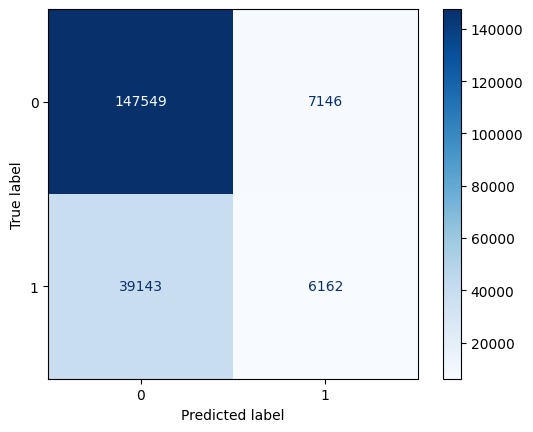

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test_processed)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")